In [ ]:
import pandas as pd
import numpy as np
import scipy
import math

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics.pairwise as pw
from sklearn.metrics.pairwise import pairwise_distances

import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import random
from scipy import sparse
from scipy.stats import pearsonr
import re

In [ ]:
from  google.colab  import  drive 
drive.mount ( '/content/drive' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ΕΙΔΙΚΟ ΘΕΜΑ/Restaurants Reviews/reviews_with_emotions_full.csv')
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [ ]:
df

,Unnamed: 0,RestaurantId,Name,UserId,Review,Rating,Emotion
0,0,1,aleria,1,A full 5 stars! Phenomenal Michelin ranked res...,5,admiration
1,1,1,aleria,2,We spent great evening here. Cozy restaurant w...,5,admiration
2,2,1,aleria,3,10/10. Aleria was our highlight during our tri...,5,admiration
3,3,1,aleria,4,Great service and fantastic food. We enjoyed e...,5,admiration
4,4,1,aleria,5,Let me put it his way: simply perfect. We hate...,5,admiration
...,...,...,...,...,...,...,...
26203,26203,30,ydria,1000,"Very good grilled octopus, spinach pie and Sau...",5,admiration
26204,26204,30,ydria,1001,"The food is sensarional, the service is great....",5,admiration
26205,26205,30,ydria,1002,Risotto was excellent. Wine was an extremely s...,4,admiration
26206,26206,30,ydria,1003,We decided to eat here for an afternoon snack ...,5,joy


Text(0.5, 1.0, 'Emotion Distribution')

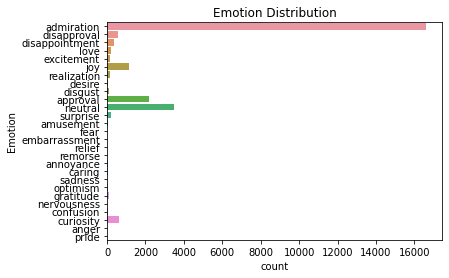

In [ ]:
sns.countplot(data = df, y = 'Emotion').set_title("Emotion Distribution")

In [ ]:
! pip install transformers -q

In [ ]:
from transformers import pipeline
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
users_input = input ("What are you looking for?: ")

What are you looking for?: beatiful place


In [ ]:
print('Users input is: ', users_input)

Users input is:  beatiful place


# Step 1 - Extracting emotion from user's input text

In [ ]:
user_emotion = emotion(users_input)

In [ ]:
print('Users emotion is: ', user_emotion)

Users emotion is:  [{'label': 'admiration', 'score': 0.969672441482544}]


# Step 2 - Finding rows with the same emotion

In [ ]:
recommend_options = df[df['Emotion'] == user_emotion[0]['label']]

In [ ]:
recommend_options

,Unnamed: 0,RestaurantId,Name,UserId,Review,Rating,Emotion
0,0,1,aleria,1,A full 5 stars! Phenomenal Michelin ranked res...,5,admiration
1,1,1,aleria,2,We spent great evening here. Cozy restaurant w...,5,admiration
2,2,1,aleria,3,10/10. Aleria was our highlight during our tri...,5,admiration
3,3,1,aleria,4,Great service and fantastic food. We enjoyed e...,5,admiration
4,4,1,aleria,5,Let me put it his way: simply perfect. We hate...,5,admiration
...,...,...,...,...,...,...,...
26202,26202,30,ydria,999,Fine dining outdoors with great service. It w...,5,admiration
26203,26203,30,ydria,1000,"Very good grilled octopus, spinach pie and Sau...",5,admiration
26204,26204,30,ydria,1001,"The food is sensarional, the service is great....",5,admiration
26205,26205,30,ydria,1002,Risotto was excellent. Wine was an extremely s...,4,admiration


# Step 3 - Get Restaurant Id that provides the feeling the most

In [ ]:
recommends_df = recommend_options.groupby("Name")['Emotion'].count().to_frame()
recommends_df = recommends_df.sort_values(by=['Emotion'], ascending = False)

In [ ]:
recommends_df

,Emotion
Name,
balcony,835
lithos,833
efcharis,818
liondi,818
maiandros,809
oroscopo,793
arcadia,777
elaea,767
karamanlidika,756


In [ ]:
recommendations = recommends_df.index.values

# Step 4 - Recommendations


In [ ]:
recommendations

array(['balcony', 'lithos', 'efcharis', 'liondi', 'maiandros', 'oroscopo',
       'arcadia', 'elaea', 'karamanlidika', 'strofi', 'sin_athina',
       'aleria', 'to_paradosiako', 'smile', 'gods_restaurant', 'nolan',
       'ydria', 'to_kati_allo', 'tzitzikas_kai_mermigas', 'o_thanasis',
       'mironi', 'alexander_the_great', 'scholarchio', 'klimataria',
       'rozalia', 'atitamos', 'mani_mani', 'athenascook'], dtype=object)